# Business case:Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

In [1]:
## Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Loading the dataset
data=pd.read_csv('players_20.csv')

In [3]:
data.shape

(18278, 104)

In [4]:
col=list(data.columns)
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

# DOMAIN ANALYSIS

### FIFA is a football simulation game, released each year by Electronic Arts Inc, the main characters of the video game, of course, the football players. Players on the video game are intended to be as close as the real ones, both physically and in skills. This set of skills determine the position they play on the field. Of course, you want a killer striker and a wall as a goalkeeper.

### sofifa_id:
It defines the identity number

### player_url:
A URL (Uniform Resource Locator), as the name suggests, provides a way to locate a resource on the web, the hypertext system that operates over the internet. The URL contains the name of the protocol to be used to access the resource and a resource name. The first part of a URL identifies what protocol to use.

### short_name:
shortest form of name only writting initials of surname and middle name

### long_name: 
Full name of each players Along with Surnames

### Age:
the period of time someone has been alive or something has existed(defining age of players)
 
### DOB:
DATE OF BIRTH ( YEAR,MONTH,DAY)
 
### height_cm: 
A centimeter is 10 millimeters, or approximately the width of a fingernail. Another way to imagine the size of a centimeter is in relation to inches. One centimeter is approximately three times smaller than an inch. 1 meter = 100 cm = 1,000 mm 1 foot = 12 inches, 1 inch = 2.54 cm, 12 x 2.54 = 30.48,1 foot is equal to 30.48 cm, 1 cm is equal to 0.032808399 feet
 
### weight_kg: 
Human body weight refers to a person's mass or weight. Body weight is measured in kilograms, a measure of mass, throughout the world in countries that use the Metric system, although in some countries such as the United States it is measured in pounds, or as in the United Kingdom, stones and pounds.
 
### Nationality: 
Your nationality is the country you come from: American, Canadian, and Russian are all nationalities. Everyone has a gender, race, sexual orientation...and a nationality. A person's nationality is where they are a legal citizen, usually in the country where they were born.
 
### Club:
A club is an organization of people interested in a particular activity or subject who usuallymeet on a regular basis.there are 20 clubs in one league 
 
### overall:
Overall Rating, OVR Rating or OVR in FIFA, The OVR rating of a player determines their general performance quality and their value in FIFA.

### potential:
having or showing the capacity to develop into something in the future.

### value_eur:
The euro (symbol: €; code: EUR) is the official currency of 19 of the 27 member states of the European Union.

### wage_eur:
 a payment usually of money for labor or services usually according to contract and on an hourly, daily, or piecework basis

### player_positions:
Position of the players in the ground or feild.

### preferred_foot:
 foot(right/left) that the player prefers to play with.

### international_reputation:
International reputation is when you have a reputation not just domestically but on the international level as well

### weak_foot:
A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.

### skill_moves:
Skill moves are one of the most important aspects of the game that is going to separate you from the average player. Examples are the drag back, heel to heel, ball rolls, elastico, and the rainbow & sombrero flicks.

### work_rate:
 the amount of effort that a football, rugby, etc. player or team puts into a game, especially when they do not have the ball.

### body_type:
 People are born with an inherited body type based on skeletal frame and body composition.

### real_face:
The kind of person someone really is rather than what the person seems to be.

### release_clause_eur:
A release clause is a term that refers to a provision within a mortgage contract. The release clause allows for the freeing of all or part of a property from a claim by the creditor after a proportional amount of the mortgage has been paid.

### player_tags:
A label attached to someone or something for the purpose of identification or to give other information.

### team_position:
The joint arrangement of a team on its field of play during a game

### team_jersey_number:
Number assigned to individual players in a team.

### loaned_from:
A sum of money that one or more individuals or companies borrow from banks.

### joined:
The date that the player joined to team.

### contract_valid_until:
Validity of the contract or agreement.

### nation_position:
A place/position where the team stands in the world.

### nation_jersey_number:
Number assigned to the team of particular country.

### pace:
Pace (PAC) is a Player Attribute in FIFA that determines a player's speed in walking and running.

### shooting:
Shooting is hitting the ball in an attempt to score a goal.

### Passing:
There are three different ways to make a pass using this new feature: directed pass/go, directed runs and player lock. With the directed pass/go, you can make a standard ground pass to a team-mate and then by flicking the right-stick, have the player who passed the ball make a run in whichever direction you want.
 
### Dribbling:
The feature allows players with excellent dribbling statistics to shift the ballquickly between their feet to prevent being tackled.To move on, you need to do more advanced dribbling techniques:
Face up Dribbling (L2/LT + R2/RT)Drag Back (R1/RB + L Flick ⇩)
Strafe Dribbling (L1 + L / (LB + L)
Fake Pass (▢ then X + direction) / (X then A + direction)
Fake Shot (◯ then X + direction) / (B then A + direction)

### Defending:
In the sport of association football, a defender is an outfield player whose primary roles are to stop attacks during the game and prevent the opposing team from scoring goals.

### physic:
the size and shape of a person's body synonym build He has the physique of a football player.
 
### gk_diving:
The keeper starts on the end middle cone. The step out to the right or left cone then dive, taking the ball out of the coaches hands low to the ground. They get up throw the ball back to the coach and go back to the start point and do the same thing to the opposite side.

### gk_kicking:
After placing the ball down, take one large stride 'straight' back. Mark that point either mentally or with a stud mark, then take a few smaller paces back. Don't go off the pitch. Then take one large sidestep to the left or right, depending which foot you kick with.

### gk_reflexes:
Many reflex saves are attributed to a keeper's alertness. Take penalties saves as an example. Prior to making their dive, goalkeepers stand upright, arms out, on their toes, and poised to make a quick move. ... The keeper has to react very quickly to get the ball to safety.

### gk_speed:
Agility means an ability to change the direction of your body with a combination of speed, strength, coordination, and balance. Goalkeepers need agility to change the shape or form of their body to make successful saves. ... Reaction time all comes down to the keeper's reflexes.

### gk_positioning:
Goalkeeper is the most defensive position in football. The goalkeeper's main job is to stop the other team from scoring by catching, palming or punching the ball from shots, headers and crosses. Unlike their teammates, goalkeepers typically remain in and around their own penalty area for most of the game.

### player_traits:
Top 6 Football Striker TraitsConfidence without arrogance. Henry Ford put it very succinctly, “If you think you can do a thing or think you can't do a thing, you're right”. Touch. The ability to control a football,or 'touch', is the most important skill for a striker to possess. ...Speed. ...Shot Accuracy. ...Football Moves.

### Attacking_crossing:
Specifically, the intention of a cross is to directly bring the ball into the box from an angle that allows the attacking forwards to more easily aim for goal with their head or feet. Crosses are generally airborne (floated) to clear nearby defenders, but can also be hit with force along the ground (drilled).

### Attacking_finishing:
Use the final third of a pitch. Create three teams (A, B and C) of three players facing the goal – one at each side of the box and the other in the middl Add cones in front of team C. ... He then receives another ball and passes to the first player in team B (2) who shoots at goal.

### Attacking_Heading_accuracy:
Offensive heading places an emphasis on accuracy finding the open area for a gosl. Attackers should be taught to get the forehead and eyes over the ball so attacker is able to drive ball downward.

### Attacking_ short_ passing:
A long pass is generally more attacking than a short pass, but this can depend on where the player is located on the field. If the player wants to drive his pass, he should approach the ball at a 30-degree angle so there is room to swing his kicking leg through.
### Attacking_volleys:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ... In this instance, one attacking player passes the ball across the goal in the air, and the other player (either standing in place or in motion) strikes ... Add cones in front of team C. ... He then receives another ball and passes to the first player in team B (2) who shoots at goal.

### Attacking_Heading_accuracy:
Offensive heading places an emphasis on accuracy finding the open area for a goal. Attackers should be taught to get the forehead and eyes over the ball so attacker is able to drive ball downward.

### Attacking_ short_ passing:
A long pass is generally more attacking than a short pass, but this can depend on where the player is located on the field. If the player wants to drive his pass, he should approach the ball at a 30-degree angle so there is room to swing his kicking leg through.

### Attacking_volleys:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ... In this instance, one attacking player passes the ball across the goal in the air, and the other player (either standing in place or in motion) strikes ...

### skill_dribbling:
Dribbling is an attacking move, where the player should retain the ball with them, until the opponent is defeated. ... Football dribbling skills are not hard to master on and maintain. Advanced players use deep dribbling moves in order to attack the opposite team and provide a fairly good passing move.

### skill_curve:
The Magnus Effect causes a ball to curve or bend in the direction it is spinning. If you want the ball to curve right, it should spin to the right. Kick your shot to the side away from where you want it to curve. ... Conversely, if you plan to curve the ball to the right, you should aim left of your target.

### skill_fk_accuracy:
Hit the ball hard and accurately, and you’ll score nine times out of 10. Of course, this is easier said than done, but working on accuracy will help you achieve great things. You can do this on the training pitch with a quality mobile goalpost and a target net — which can be attached to any standard set of goalposts. You’ll have at least two clearly defined and relatively small targets to aim at, which should help you to hone your accuracy over time. There is also a target sheet that blocks the entire goal except for a small area at each corner.

### skill_long_passing:
A long pass is an attacking skill that allows players to switch the direction of the attack very quickly to create space, find a teammate or to catch out the opposition.

### skill_ball_control:
Getting and keeping the ball under control is an important skill a football player has to learn and in response to this, an essential skill a coach should teach players of all positions is to develop the ability to handle the ball.

### movement_acceleration:  
Receivers and running backs need the ability to accelerate quickly for success in their positions. ... Making acceleration an instilled action will immediately improve a player's performance.

### movement_sprint_speed: 
It measures how many feet per second a player runs in his fastest one-second window.
 
### movement_agility: 
Agility is the player's capability to perform rapid whole body movement with change of velocity or direction in response to a stimulus 

### movement_reactions:
Movement refers to the change of position of ball or player from one place to another.
 
### movement_balance:
ability of player to balance thier movement/speed.
 
### power_shot_power:
It's a technique for harder shot. Power in your shot comes from your thighs, hips, and stomach.

### power_jumping:
The ability to exert a maximal force in as short a time as possible, as in accelerating, jumping and throwing implements.

### power_stamina:
The ability to sustain prolonged physical or mental effort.

### power_strength:
Strength is simply the amount of weight that can be moved and not the speed in which it is moved.
 
### power_long_shots:
It's a technique where You have to hit the ball a long hard.

### mentality_aggression:
any form of behaviour directed toward the goal of harming of injuring another live being who is motivated to avoid such treatment.

### mentality_interceptions:
An interception or intercept is a move in football that happens when a player on the defensive team catches a ball from the quarterback instead of the intended receiver. The most common players to get interceptions are defensive backs.

### mentality_positioning:
Most sports are played from a sideways position; this makes the movement to strike easier as well as to be well positioned to see as much of the pitch and surrounding area as possible.

### mentality_vision: 
Vision is the ability to see potential passes. For example, a player with mediocre passing ability only sees what's directly in front of him. He passes the ball to a forward with a defender on his back.

### mentality_penalties:
Changing your mind leads to uncertainty, stress and poor technique. Some players leave it to the last minute and wait for the keeper to dive before hitting it to the other side. However, this is a high risk strategy and is associated with a greater number of missed penalties.

### mentality_composure:
Composure in football is one's ability to perform well under pressure. In big games players can either rise to the occasion and play well or play poorly under pressure.

### defending_marking:
In association football, marking is an organized defensive strategy which aims to prevent a member of the opposing team (usually a striker) from taking control of the ball.

### defending_standing_tackle:
It's a technique in football where players Use their tackling leg and hook around the front to dispossess the ball with force. Use thier instep to power the ball away from the attacker.

### defending_sliding_tackle:
A sliding tackle or slide tackle is a tackle in association football. It is completed with one leg extended to push the ball away from the opposing player.

### goalkeeping_diving:
The keeper starts on the end middle cone. The step out to the right or left cone then dive, taking the ball out of the coaches hands low to the ground. They get up throw the ball back to the coach and go back to the start point and do the same thing to the opposite side.

### goalkeeping_handling:
Handling (HAN) is a Player Attribute in FIFA that determines a player's ability to handle the ball and hold onto it using their hands as a goalkeeper.

### goalkeeping_kicking:
A goal kick is awarded to the defending team when the ball goes out of the field of play by crossing, either on the ground or in the air, the goal line, without a goal being scored, when the last person to touch the ball was from the attacking team.

### goalkeeping_positioning:
Position of a goal keeper,They have to position themselves in a way, which gives the server the least amount of goal to hit.

### goalkeeping_reflexes:
A reflex is an involuntary, or automatic action that your body does in response to something — without you even having to think about it.

### LS:
LS stands for Long Snapper (football).

### ST:
Striker. A similar function as the center and wing forward. IF – Inside forward. In the old days an offensive line could consist of five attackers and include two inside forwards positioned between the wing forwards and the center forward and normally a little behind the other three.

### RS:
In soccer, the abbreviation “RS” means Right Striker. The right striker(RS) is positioned on the right-hand side of the forward players near the opposition's goal.

### LW:
LW – left wing. Similar to the left wing back, but usually with a primarily offensive task. In other words, an offensive wing midfielder.

### LF:
In soccer, the abbreviation “LF” means Left Forward. The left forward(LF) is positioned on the left-hand side of the team's attacking line.

### CF:
center forward. The attacker that is positioned in the middle of the offensive line. In modern football it has become common to only use one or two attackers; therefore a center forward may not be quite relevant as a description.

### RF:
Well RF/LF stands for Right Forward and Left Forward. Forward meaning striker. The wide attacking midfielders are usually the ones to feed the ball to forwards and sit deeper in field. Alex Iwobi is an example of a wide attacking midfielder, whereas Gareth Bale is an example of an RF.

### RW:
RW – right wing. The same as the left wing, but on the opposite wing. M – midfielder. WF – wing forward. An attacker in offensive position on the wing.

### LAM:
LAM Left attacking midfield.

### CAM:
The Central Attacking Midfielder, or CAM, on a team, is positioned in the center of the soccer field just behind the forwards. Their role is to assist and support the forwards on their team in an attack on the opposition goal

### RAM:
Right (off-centre) Attacking Midfielder)

### LM:
In soccer, the abbreviation “LM” means Left Midfielder. ... The left midfielder(LM) is often one of the fastest players on a team and is skilled at crossing the ball.

### LCM:
Left (off-centre) Centre Midfielder 

### CM:
CM – center midfielder.

### RCM:
Right (off-centre) Centre Midfielder.

### RM:
Right Midfielder.

### LWB:
Another name for the defensive player that either plays on the left side (left back) or the right side (right back). LWB – left wing back. Positioned in front of the left back and out on the “wing”.

### LDM:
Left (off-centre) Defensive Midfielder.

### CDM:
Central Defensive Midfielder.

### RDM:
Right (off-centre) Defensive Midfielder.

### RWB:
RWB – right wing back. Positioned in front of the right back. D – defender. DM – defensive midfielder. ... In other words, an offensive wing midfielder.

### LB:
A linebacker (LB or backer) is a playing position in gridiron football. Linebackers are members of the defensive team, and line up approximately three to five yards (4 m) behind the line of scrimmage and behind the defensive linemen.

### LCB:
In soccer, the abbreviation “LCB” means Left Center Back. ... The role of the left-center back(LCB) is to defend the left-hand side of the soccer field and prevent any opposition players, or the soccer ball, from getting past them.

### CB:
The job of the centre-back, (or central defender) (historically called a centre-half) is to stop opposing players, particularly the strikers, from scoring, and to bring the ball out from their penalty area. As their name suggests, they play in a central position.

### RCB:
Right Cornerback.

### RB:
A running back (RB) is a member of the offensive backfield in gridiron football. The primary roles of a running back are to receive handoffs from the quarterback to rush the ball, to line up as a receiver to catch the ball, and block.

# BASIC CHECKS

In [5]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
data.shape

(18278, 104)

In [8]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [9]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/230809/callum-johnso...,J. Rodríguez,Liam Kelly,1992-02-29,England,Lazio,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


# Exploratory Data Analysis

## Univariate analysis

In [11]:
import sweetviz as sv

In [12]:
report=sv.analyze(data)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights of univariate analysis
### sofifa_id:
90% of the ID lies between 150k to 250k. 

### Age:
All players are aged between 16years to 42years old.

### height_cm: 
80% of the players are more than 180 cm tall.

### weight_kg: 
Average weight of the players is 69kgs to 80kgs.
 
### overall:
30% of players have highesht Overall Rating.

### potential:
70 to 75 is the average potential.

### value_eur:
95% of players earn 10.5M euro.

### wage_eur:
9k euro is the average wages.

### preferred_foot:
more than 75% of players prefer playing with right foot.

### international_reputation:
90% of the players have international reputation.

### weak_foot:
60% of the players have 3 rating for their weak foot.

### skill_moves:
45% of the players have 2 skill moves.

### work_rate:
50% of the players have Medium workrate and the rest players vary from low to high.

### body_type:
60% of the players have normal body type.

### real_face:
only 10% players have true face.

### release_clause_eur:
4.5M euro is the average release clause.

### player_tags:
92% of the data is missing and in 8% of remaining data,40% of the players have strength as their tag.

### team_position:
40% of the players have SUB position.

### team_jersey_number:
30% of the players have jersey number as single digit or number less than 10.

### contract_valid_until:
34% of contracts have ended in 2020 and 22% of contracts are ending by 2021.

### nation_position:
94% of the data is missing.

### nation_jersey_number:
94% of the data is missing.

### pace:
60 to 75 is the average pace of the player.

### shooting:
60 to 70 is the average shooting speed.

### Passing:
59 to 64 is the average passing speed of the players.

### Dribbling:
60 to 65 is the average dribbling speed of the players.

### Defending:
25% of player defends the ball with 60 to 65 value.

### physic:
65 is the average phisic value.

### gk_diving:
Because 89% of data is missing,11% of 85% of the players gk diving is above average.

### gk_kicking:
60 to 65 is the average gk kicking value.

### gk_reflexes:
58 to 65 is the average gk reflexes value.

### gk_speed :
50 is the average gk_speed.

### gk_positioning :
60 and 70 is the average gk_positioning.

### attacking_crossing :
60 is the average attacking_crossing.

### attacking_finishing :
60 is the average attacking_finishing.

### attacking_heading_accuracy :
60 is the average attacking_heading_accuracy.

### attacking_short_passing :
60 is the average attacking_short_passing.

### attacking_volleys :
attacking_volleys has average value from 40 to 60.

### skill_dribbling :
60 is the average skill_dribbling.

### skill_curve :
most of the player has average skill_curve from 30 to 70

### skill_fk_accuracy :
30 to 60 is the average value of skill_fk_accuracy.

### skill_long_passing :
60 is the average skill_long_passing.

### skill_ball_control :
65 to 70 is the average skill_ball_control.

### movement_acceleration:
70 to 80 is the average movement_acceleration

### movement_sprint_speed:
70 is the average movement_sprint_speed 

### movement_agility:
70 to 75 is the average movement_agility

### movement_reactions:
60 to 70 is the average movement_reactions

### movement_balance:
65 to 75 is the average movement_balance

### power_shot_power:
50 to 75 is the average power_shot_power

### power_jumping:
60 to 75 is the average power_jumping

### power_stamina:
70 is the average power_stamina

### power_strength:
60 and 70 is the average power_strength

### power_long_shots:
every player has average power_long_shots but only 5% of players has highest power_long_shots that is 90

### mentality_aggression: 
60 to 70 is the average mentality_aggression rate

### mentality_interceptions: 
20 and 60 is the average mentality_interceptions

### mentality_positioning:
40% of players has average mentality_positioning i,e 60 to 70

### mentality_vision:
60 is the average mentality_vision

### mentality_penalties:
50 to 60 is the average mentality_penalties

### mentality_composure:
60 is the average mentality_composure

### defending_marking:
60 is the average mentality_marking

### defending_standing_tackle:
60 and 70 is the average defending_standing_tackle

### defending_sliding_tackle:
60 and 70 is the average defending_sliding_tackle

### goalkeeping_diving:
since its a skill of goalkeeper we have so many zero values still 10 to 20 is the average goalkeeping_diving.

### goalkeeping_handling:
since its a skill of goalkeeper we have so many zero values still 10 to 20 is the average goalkeeping_handling.

### goalkeeping_kicking:
since its a skill of goalkeeper we have so many zero values still 10 to 20 is the average goalkeeping_kicking.

### goalkeeping_positioning:
since its a skill of goalkeeper we have so many zero values still 10 to 20 is the average goalkeeping_positioning.

### goalkeeping_reflexes:
since its a skill of goalkeeper we have so many zero values still 10 to 20 is the average goalkeeping_reflexes.


# Preprocessing

In [13]:
## Checking missing values
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [14]:
col=list(data.columns)
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [15]:
## Dropping useless columns
df1=data.drop(columns={'sofifa_id', 'player_url', 'short_name', 'long_name','dob','player_tags','team_jersey_number'},axis=1)

In [16]:
df1.head()

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [17]:
df2=df1.iloc[:,0:20]

In [18]:
df2.head()

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,loaned_from
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,NaN
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,NaN
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,NaN
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,NaN
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,NaN


In [19]:
df2.isnull().sum()

age                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur           1298
team_position                 240
loaned_from                 17230
dtype: int64

imputing mean value to release_clause_eur

In [20]:
## dropped useless columns
df2.drop(columns={'team_position','loaned_from'},axis=1,inplace=True)

In [21]:
df2['release_clause_eur']=df2['release_clause_eur'].fillna(0).astype(int)

In [22]:
df2.release_clause_eur.isnull().sum()

0

In [23]:
df3=df1.iloc[:,20:40]

In [24]:
df3.head()

,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy
0,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70
1,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89
2,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62
3,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15
4,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61


In [25]:
df3.isnull().sum()

joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
dtype: int64

In [26]:
df3=df3.drop(columns={'joined','contract_valid_until','nation_position','nation_jersey_number'},axis=1)

In [27]:
df3.head()

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy
0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70
1,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89
2,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62
3,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15
4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61


In [28]:
df3.shape

(18278, 16)

In [29]:
df3.isnull().sum()

pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
dtype: int64

In [30]:
## filling the missing values of the goal keepers in the players section with value 0
df3['pace'].fillna(value=0,inplace=True)
df3['shooting'].fillna(value=0,inplace=True)
df3['passing'].fillna(value=0,inplace=True)
df3['dribbling'].fillna(value=0,inplace=True)
df3['defending'].fillna(value=0,inplace=True)
df3['physic'].fillna(value=0,inplace=True)

In [31]:
## filling the missing values of the players in the goal keeping section with value 0
df3['gk_diving'].fillna(value=0,inplace=True)
df3['gk_handling'].fillna(value=0,inplace=True)
df3['gk_kicking'].fillna(value=0,inplace=True)
df3['gk_reflexes'].fillna(value=0,inplace=True)
df3['gk_speed'].fillna(value=0,inplace=True)
df3['gk_positioning'].fillna(value=0,inplace=True)

In [32]:
df3.player_traits.value_counts()

Early Crosser                                                             501
Power Free-Kick                                                           370
Long Passer (CPU AI Only)                                                 354
Crowd Favourite                                                           296
Argues with Officials                                                     294
                                                                         ... 
Power Free-Kick, Flair, Second Wind                                         1
Long Throw-in, Speed Dribbler (CPU AI Only), Crowd Favourite                1
Diver, Avoids Using Weaker Foot, Argues with Officials, Giant Throw-in      1
Diver, Avoids Using Weaker Foot, Beat Offside Trap                          1
Selfish, Speed Dribbler (CPU AI Only), Giant Throw-in                       1
Name: player_traits, Length: 921, dtype: int64

In [33]:
df3=df3.drop('player_traits',axis=1)

In [34]:
df3.isnull().sum()

pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
dtype: int64

In [35]:
df4=df1.iloc[:,40:70]
df4.head()

,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
0,92,88,97,93,94,92,96,91,84,93,...,94,75,96,33,37,26,6,11,15,14
1,83,87,89,81,76,77,92,89,91,87,...,82,85,95,28,32,24,7,11,15,14
2,87,87,96,88,87,81,95,94,89,96,...,90,90,94,27,26,29,9,9,15,15
3,43,13,12,13,14,40,30,43,60,67,...,65,11,68,27,12,18,87,92,78,90
4,89,83,95,83,79,83,94,94,88,95,...,89,88,91,34,27,22,11,12,6,8


In [36]:
df4.isnull().sum()

attacking_short_passing      0
attacking_volleys            0
skill_dribbling              0
skill_curve                  0
skill_fk_accuracy            0
skill_long_passing           0
skill_ball_control           0
movement_acceleration        0
movement_sprint_speed        0
movement_agility             0
movement_reactions           0
movement_balance             0
power_shot_power             0
power_jumping                0
power_stamina                0
power_strength               0
power_long_shots             0
mentality_aggression         0
mentality_interceptions      0
mentality_positioning        0
mentality_vision             0
mentality_penalties          0
mentality_composure          0
defending_marking            0
defending_standing_tackle    0
defending_sliding_tackle     0
goalkeeping_diving           0
goalkeeping_handling         0
goalkeeping_kicking          0
goalkeeping_positioning      0
dtype: int64

In [37]:
df5=df1.iloc[:,70:]
df5

,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [38]:
df5.isnull().sum()

goalkeeping_reflexes       0
ls                      2036
st                      2036
rs                      2036
lw                      2036
lf                      2036
cf                      2036
rf                      2036
rw                      2036
lam                     2036
cam                     2036
ram                     2036
lm                      2036
lcm                     2036
cm                      2036
rcm                     2036
rm                      2036
lwb                     2036
ldm                     2036
cdm                     2036
rdm                     2036
rwb                     2036
lb                      2036
lcb                     2036
cb                      2036
rcb                     2036
rb                      2036
dtype: int64

In [39]:
df5.head()

,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [40]:
##imputing missing values
df5.ls.fillna(value='0+0',inplace=True)
df5.st.fillna(value='0+0',inplace=True)
df5.rs.fillna(value='0+0',inplace=True)
df5.lw.fillna(value='0+0',inplace=True)
df5.cf.fillna(value='0+0',inplace=True)
df5.rf.fillna(value='0+0',inplace=True)
df5.lf.fillna(value='0+0',inplace=True)
df5.rw.fillna(value='0+0',inplace=True)
df5.lam.fillna(value='0+0',inplace=True)
df5.cam.fillna(value='0+0',inplace=True)
df5.ram.fillna(value='0+0',inplace=True)
df5.lm.fillna(value='0+0',inplace=True)
df5.lcm.fillna(value='0+0',inplace=True)
df5.cm.fillna(value='0+0',inplace=True)
df5.rcm.fillna(value='0+0',inplace=True)
df5.rm.fillna(value='0+0',inplace=True)
df5.lwb.fillna(value='0+0',inplace=True)
df5.ldm.fillna(value='0+0',inplace=True)
df5.cdm.fillna(value='0+0',inplace=True)
df5.rdm.fillna(value='0+0',inplace=True)
df5.rwb.fillna(value='0+0',inplace=True)
df5.lb.fillna(value='0+0',inplace=True)
df5.lcb.fillna(value='0+0',inplace=True)
df5.cb.fillna(value='0+0',inplace=True)
df5.rcb.fillna(value='0+0',inplace=True)
df5.rb.fillna(value='0+0',inplace=True)

In [41]:
## Replacing + sign with.
df5['ls'] = df5['ls'].str.replace('+', '.')
df5['st']=df5['st'].str.replace('+','.')
df5['rs']=df5['rs'].str.replace('+','.')
df5['lw']=df5['lw'].str.replace('+','.')
df5['cf']=df5['cf'].str.replace('+','.')
df5['lf']=df5['lf'].str.replace('+','.')
df5['rw']=df5['rw'].str.replace('+','.')
df5['lam']=df5['lam'].str.replace('+','.')
df5['lm']=df5['lm'].str.replace('+','.')
df5['lcm']=df5['lcm'].str.replace('+','.')
df5['cm']=df5['cm'].str.replace('+','.')
df5['rcm']=df5['rcm'].str.replace('+','.')
df5['rm']=df5['rm'].str.replace('+','.')
df5['lwb']=df5['lwb'].str.replace('+','.')
df5['ldm']=df5['ldm'].str.replace('+','.')
df5['cdm']=df5['cdm'].str.replace('+','.')
df5['rdm']=df5['rdm'].str.replace('+','.')
df5['rwb']=df5['rwb'].str.replace('+','.')
df5['lb']=df5['lb'].str.replace('+','.')
df5['lcb']=df5['lcb'].str.replace('+','.')
df5['cb']=df5['cb'].str.replace('+','.')
df5['rcb']=df5['rcb'].str.replace('+','.')
df5['rb']=df5['rb'].str.replace('+','.')
df5['lf'] =df5['lf'].str.replace('+', '.')
df5['rf'] =df5['rf'].str.replace('+', '.')
df5['cam'] =df5['cam'].str.replace('+', '.')
df5['ram'] =df5['ram'].str.replace('+', '.')

In [42]:
##coverting object datatype to float.
df5['ls'] = df5['ls'].astype(float)
df5['st']=df5['st'].astype(float)
df5['rs']=df5['rs'].astype(float)
df5['lw']=df5['lw'].astype(float)
df5['cf']=df5['cf'].astype(float)
df5['rw']=df5['rw'].astype(float)
df5['lam']=df5['lam'].astype(float)
df5['lm']=df5['lm'].astype(float)
df5['lcm']=df5['lcm'].astype(float)
df5['cm']=df5['cm'].astype(float)
df5['rcm']=df5['rcm'].astype(float)
df5['rm']=df5['rm'].astype(float)
df5['lwb']=df5['lwb'].astype(float)
df5['ldm']=df5['ldm'].astype(float)
df5['cdm']=df5['cdm'].astype(float)
df5['rdm']=df5['rdm'].astype(float)
df5['rwb']=df5['rwb'].astype(float)
df5['lb']=df5['lb'].astype(float)
df5['lcb']=df5['lcb'].astype(float)
df5['cb']=df5['cb'].astype(float)
df5['rcb']=df5['rcb'].astype(float)
df5['rb']=df5['rb'].astype(float)
df5['lf']=df5['lf'].astype(float)
df5['rf']=df5['rf'].astype(float)
df5['cam']=df5['cam'].astype(float)
df5['ram']=df5['ram'].astype(float)

In [43]:
##coverting float datatype to integer.
df5['ls'] = df5['ls'].astype(int)
df5['st']=df5['st'].astype(int)
df5['rs']=df5['rs'].astype(int)
df5['lw']=df5['lw'].astype(int)
df5['cf']=df5['cf'].astype(int)
df5['rw']=df5['rw'].astype(int)
df5['lam']=df5['lam'].astype(int)
df5['lm']=df5['lm'].astype(int)
df5['lcm']=df5['lcm'].astype(int)
df5['cm']=df5['cm'].astype(int)
df5['rcm']=df5['rcm'].astype(int)
df5['rm']=df5['rm'].astype(int)
df5['lwb']=df5['lwb'].astype(int)
df5['ldm']=df5['ldm'].astype(int)
df5['cdm']=df5['cdm'].astype(int)
df5['rdm']=df5['rdm'].astype(int)
df5['rwb']=df5['rwb'].astype(int)
df5['lb']=df5['lb'].astype(int)
df5['lcb']=df5['lcb'].astype(int)
df5['cb']=df5['cb'].astype(int)
df5['rcb']=df5['rcb'].astype(int)
df5['rb']=df5['rb'].astype(int)
df5['lf']=df5['lf'].astype(int)
df5['rf']=df5['rf'].astype(int)
df5['cam']=df5['cam'].astype(int)
df5['ram']=df5['ram'].astype(int)

In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   goalkeeping_reflexes  18278 non-null  int64
 1   ls                    18278 non-null  int32
 2   st                    18278 non-null  int32
 3   rs                    18278 non-null  int32
 4   lw                    18278 non-null  int32
 5   lf                    18278 non-null  int32
 6   cf                    18278 non-null  int32
 7   rf                    18278 non-null  int32
 8   rw                    18278 non-null  int32
 9   lam                   18278 non-null  int32
 10  cam                   18278 non-null  int32
 11  ram                   18278 non-null  int32
 12  lm                    18278 non-null  int32
 13  lcm                   18278 non-null  int32
 14  cm                    18278 non-null  int32
 15  rcm                   18278 non-null  int32
 16  rm  

In [45]:
## Concatinating or adding all dataframes
data1=pd.concat([df2,df3,df4,df5],axis=1)

In [46]:
col1=list(data1.columns)
print(col1)

['age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_markin

In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   nationality                 18278 non-null  object 
 4   club                        18278 non-null  object 
 5   overall                     18278 non-null  int64  
 6   potential                   18278 non-null  int64  
 7   value_eur                   18278 non-null  int64  
 8   wage_eur                    18278 non-null  int64  
 9   player_positions            18278 non-null  object 
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [48]:
data1.describe(include='O')

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face
count,18278,18278,18278,18278,18278,18278,18278
unique,162,698,643,2,9,10,2
top,England,Lazio,CB,Right,Medium/Medium,Normal,No
freq,1667,33,2322,13960,9875,10750,16310


In [49]:
#coverting float datatype to integer.
data1['pace']=data1['pace'].astype(int)
data1['shooting']=data1['shooting'].astype(int)
data1['passing']=data1['passing'].astype(int)
data1['dribbling']=data1['dribbling'].astype(int)
data1['defending']=data1['defending'].astype(int)
data1['physic']=data1['physic'].astype(int)
data1['gk_diving']=data1['gk_diving'].astype(int)
data1['gk_handling']=data1['gk_handling'].astype(int)
data1['gk_kicking']=data1['gk_kicking'].astype(int)
data1['gk_reflexes']=data1['gk_reflexes'].astype(int)
data1['gk_speed']=data1['gk_speed'].astype(int)
data1['gk_positioning']=data1['gk_positioning'].astype(int)

In [50]:
##Encoding columns with label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.nationality=le.fit_transform(data1.nationality)
data1.club=le.fit_transform(data1.club)
data1.player_positions=le.fit_transform(data1.player_positions)
data1.preferred_foot=le.fit_transform(data1.preferred_foot)
data1.work_rate=le.fit_transform(data1.work_rate)
data1.body_type=le.fit_transform(data1.body_type)
data1.real_face=le.fit_transform(data1.real_face)

In [51]:
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         18278 non-null  int64
 1   height_cm                   18278 non-null  int64
 2   weight_kg                   18278 non-null  int64
 3   nationality                 18278 non-null  int32
 4   club                        18278 non-null  int32
 5   overall                     18278 non-null  int64
 6   potential                   18278 non-null  int64
 7   value_eur                   18278 non-null  int64
 8   wage_eur                    18278 non-null  int64
 9   player_positions            18278 non-null  int32
 10  preferred_foot              18278 non-null  int32
 11  international_reputation    18278 non-null  int64
 12  weak_foot                   18278 non-null  int64
 13  skill_moves                 18278 non-null  int64
 14  work_r

In [52]:
#creation of required X
X=data1.values
X

array([[ 32, 170,  72, ...,  52,  52,  63],
       [ 34, 187,  83, ...,  53,  53,  61],
       [ 27, 175,  68, ...,  46,  46,  61],
       ...,
       [ 19, 186,  75, ...,  49,  49,  47],
       [ 18, 185,  74, ...,  49,  49,  48],
       [ 26, 182,  78, ...,  50,  50,  48]], dtype=int64)

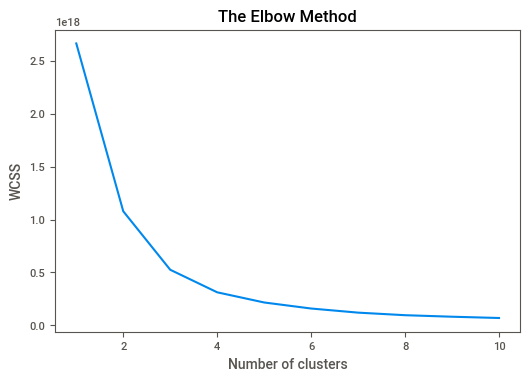

In [53]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=45)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [54]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 ... 0 0 0]


In [55]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=64) 
y_kmeans = kmeans.fit_predict(X)

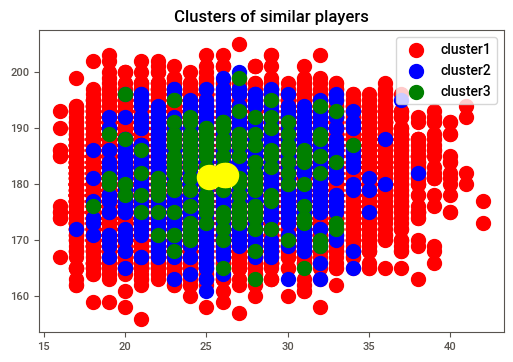

In [56]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow')
plt.title('Clusters of similar players')
plt.legend()
plt.show()

In [57]:
## Evalauting the clusters prepared
from sklearn.metrics import silhouette_score
label=kmeans.labels_
label

array([2, 2, 2, ..., 0, 0, 0])

In [58]:
score=silhouette_score(X,label)
score

0.8247312453665444